In [3]:
# （必須）モジュールのインポート
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass

In [2]:
# （必須）カレントディレクトリの変更（自分の作業フォルダのパスをコピーして入力する）
os.chdir(r"C:\Users\parar\OneDrive\sport_data")

# Matplotlibの基礎

本章は主に以下の文献とウェブサイトを参考にしている：

- Jake VanderPlas, Pythonデータサイエンスハンドブック，オライリー，2018
- 橋本洋志，牧野浩二，Pythonコンピュータシミュレーション入門，オーム社，2021．
- [note.nkmk.me](https://note.nkmk.me)
- [YutaKaのPython教室 > Matplotlib](https://www.yutaka-note.com)

以下のMatplotlib公式ギャラリーには様々なグラフとそのコードがまとまっている．
この中から作成したい図に近いものを見つけ，コードを参考にすると良い．
- [Matplotlib公式ギャラリー](https://matplotlib.org/stable/gallery/index.html)

## Matplotlibの基本操作
---

### Matplotlibのインポート

Matplotlibは以下のようにインポートするのが慣例である．
なお，日本語を使用するために，既に説明したjapanize_matplotlibもインポートしておく．

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass

### プロットの基本中の基本

Matplotlibの最も基本的なプロット関数が`pyplot.plot`（以下，単に`plot`メソッド）である．
プロットには２つのスタイルが存在するが，**本講義ではオブジェクト指向スタイルを採用する**（詳細はページ下部の**参考**を参照）．
pyplotをpltという名前でインポートした場合は以下のように使用する：
```python
fig, ax = plt.subplots()
ax.plot(x, y, option)
```

`plot`メソッドは第1引数に$x$座標のデータ，第2引数に$y$座標のデータ，第3引数以降に色・マーカー・線種およびその他のオプションを指定する．
指定するデータはリストやNumPy配列，Seriesなどに対応している．
例えば，以下の場合は$(0, 1)$，$(1, -1)$，$(2, 1)$，$(3, -1)$に`'x'`マーカーがプロットされ，その間が線で結ばれる．

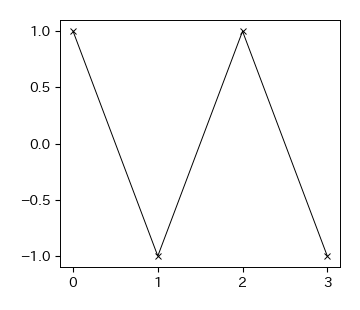

In [2]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3], [1, -1, 1, -1], 'x-')

### グラフ作成の一連の流れ
データのプロット，グラフの装飾，グラフの保存までの一連の流れは以下の通りである．

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(3, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

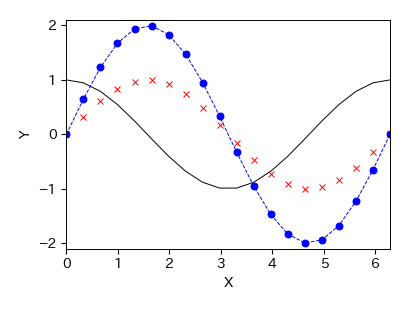

In [8]:
# FigureとAxesを生成する
fig, ax = plt.subplots(figsize=(4, 3))

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi, 20)
ax.plot(x, np.cos(x), '-')   # 折れ線
ax.plot(x, np.sin(x), 'rx')  # 赤のo
ax.plot(x, 2*np.sin(x), 'bo--');  # 青のoを点線で結ぶ

# Axesを装飾する
ax.set_xlim(0, 2*np.pi); ax.set_ylim(-2.1, 2.1)
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する（相対パスを指定）
fig.savefig('./5_matplotlib/graph1.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

## 様々なグラフ
---

### 基本のプロット関数

Matplotlibの最も基本的なプロット関数が`pyplot.plot()`である．
Axesオブジェクトを`ax`として取得したい場合，`plot`関数は以下のように実行する：
```python
ax.plot(x, y, 'rx-', option)
```
`plot`関数の第3引数は色・マーカー・線種を同時指定することができる．
主要なoptionを以下にまとめる．

| オプション名 | 省略表記 | 内容 | 指定の仕方（例） | 
| ---- | ---- | ---- | ---- |
| color | c | 色 | 'k'(='black'), 'r'(='red'), 'b'(='blue') |
| linestyle | ls | 線種 | '-', '--', ':' , '-.', 'None' |
| marker | なし |マーカーの種類 | 'x', 'o', '^', '.', '+', 's', 'd' |
| markersize | ms | マーカーのサイズ | 数値 |
| markeredgecolor | mec | マーカーの境界の色 | 色名 |
| markerfacecolor | mfc | マーカーの塗りつぶしの色 | 色名 |
| linewidth | lw | 線の太さ | 数値 |
| alpha | なし | 透過度 | 0~1 |

**色の指定**

- `color='red'`のように色名で指定する．
- 'red'，'green'，'blue'，'black'，'white'，'yellow'，'magenta'，'cyan'は'r'のように頭文字だけで指定できる．
- 他の色名は[ここ](https://matplotlib.org/stable/gallery/color/named_colors.html)にまとまっている．
- 色を指定しない場合はデフォルトの色から順に指定される．

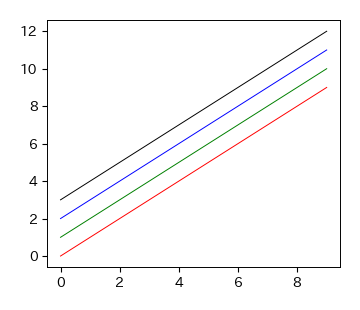

In [70]:
# 様々な色の指定方法
fig, ax = plt.subplots()
x = np.arange(0, 10)
ax.plot(x, x, 'red')  # 第3引数に色名を指定
ax.plot(x, x+1, 'g')  # 第3引数に色名の頭文字を指定
ax.plot(x, x+2, color='blue') # colorオプションに色名を指定
ax.plot(x, x+3, c='k'); # colorオプションに色名の頭文字を指定

**マーカーの指定**

- `marker='x'`のように指定する
- 主要なマーカー：'x', 'o', '^', '.', '+', 's', 'd'
- 他のマーカーは[ここ](https://matplotlib.org/stable/api/markers_api.html)にまとまっている
- マーカーを指定しない場合はデフォルトのマーカーが順に指定される

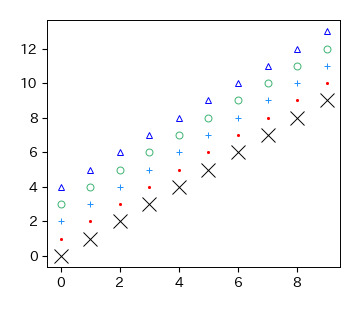

In [71]:
# 様々なマーカー
fig, ax = plt.subplots()
x = np.arange(0, 10)
ax.plot(x, x, 'x', ms=10)   # 第3引数にマーカーを指定し，サイズを10に変更
ax.plot(x, x+1, '.', ms=3)
ax.plot(x, x+2, '+', ms=5)
ax.plot(x, x+3, marker='o', ls='None', mfc='None')
ax.plot(x, x+4, marker='^', ls='None', mfc='None', mec='b');

**線種の指定**
- `linestyle='-'`のように指定する
- 主要な線種：'-', '--', ':' , '-.', 'None'

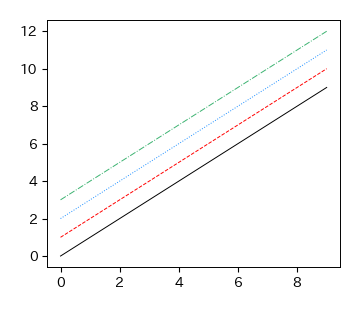

In [72]:
# 様々な線種
fig, ax = plt.subplots()
x = np.arange(0, 10)
ax.plot(x, x, '-')
ax.plot(x, x+1, linestyle='--')
ax.plot(x, x+2, ls=':')
ax.plot(x, x+3, ls='-.');

### 棒グラフ

- Matplotlibで棒グラフを描くには`bar`メソッドを用いる：
```python
    ax.bar(x, h, width=1.0, option)
```
- 第１引数`x`には棒グラフを出力する$x$軸上の位置，第２引数`h` には高さを指定する．
- その他のオプションは[ここ](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.bar.html)にまとまっている．

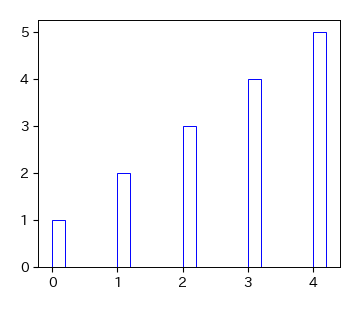

In [66]:
fig, ax = plt.subplots()

x = np.arange(5)
h = np.arange(1, 6, 1)
ax.bar(x, h, width=0.2, align='edge', color='w', edgecolor='b')

### （参考）矢印

- 矢印を描くには，`quiver`メソッドを用いる．
- 始点 $(x, y)$ から $(u, v)$ の方向に長さ$\sqrt{u^2 + v^2}$の矢印を描くには，以下のように実行する：
```python
    ax.quiver(x, y, u, v, angles='uv', units='xy', scale=1, width=1)
```
- ただし，以下のようにアスペクト比を'equal'に変更しないと見た目がずれる：
```python
    ax.set_aspect('equal')
```
- 'angles'，'units'，'scale'などは挙動が分かりにくいので，詳しくは[ここ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)を参照のこと．

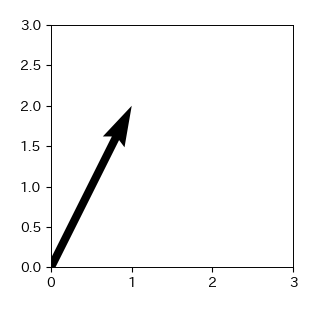

In [35]:
# 1つの矢印
x, y = 0, 0  # 矢印（ベクトル）の始点
u, v = 1, 2  # 矢印（ベクトル）の成分

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.quiver(x, y, u, v, angles='uv', units='xy', scale=1, width=0.1)
ax.set_xlim([0, 3]); plt.ylim([0, 3]);

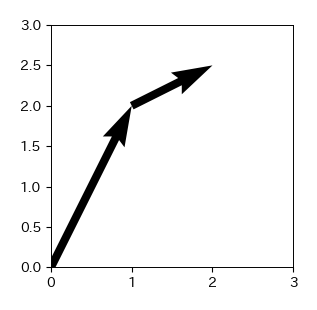

In [36]:
# 複数の矢印
x, y = ar([0, 1]), ar([0, 2])    # 矢印（ベクトル）の始点
u, v = ar([1, 1]), ar([2, 0.5])  # 矢印（ベクトル）の成分

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.quiver(x, y, u, v, angles='uv', units='xy', scale=1, width=0.1)
ax.set_xlim([0, 3]); plt.ylim([0, 3]);

## グラフの装飾
---

Axesオブジェクトには`ax.plot`や`ax.bar`などのグラフを描くメソッドの他に，グラフを装飾するための様々なメソッドが用意されている．
まずは，主要なメソッドを用いたグラフ装飾の例を示す．

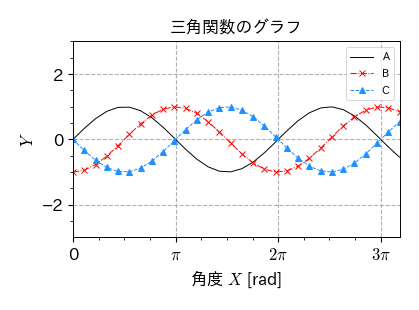

In [9]:
'''FigureとAxesの生成'''
fig, ax = plt.subplots(figsize=(5, 3))

'''Axesに対する描画'''
x = np.linspace(0, 10, 30)
ax.plot(x, np.sin(x), '-', label='A')
ax.plot(x, np.sin(x-np.pi/2), 'x-.', label='B')
ax.plot(x, np.sin(x-2*np.pi/2), '^--', label='C')

''' Axesの装飾 '''
# 座標軸の範囲の設定
ax.set_xlim(0, 10)
ax.set_ylim(-3, 3)

# アスペクト比
ax.set_aspect('equal')

# タイトル
ax.set_title('三角関数のグラフ', fontsize=12)

# 軸ラベル
ax.set_xlabel('角度 $X$ [rad]', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)

# 凡例
ax.legend(loc='best', frameon=True, fontsize=8, numpoints=1)

# 補助目盛りの表示
ax.minorticks_on()

# 目盛線の表示
ax.grid(axis='both', which='major', linestyle='--')

# 目盛りラベルを文字列に変更
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
ax.set_xticklabels(['0', '$\pi$', '$2\pi$', '$3\pi$'])

# 目盛りのラベルサイズ
ax.tick_params(axis='both', labelsize=12)

'''Figureの保存'''
fig.savefig('./5_matplotlib/multi_sin.pdf', bbox_inches='tight')

### 座標軸の範囲

- 座標軸の表示範囲を変更するには`ax.set_xlim(x_min, x_max)`および`ax.set_xlim(y_min, y_max)`を実行する．
- 第1，第2引数には表示範囲の最小値と最大値を指定する．

```python
ax.set_xlim(0, 10)
ax.set_ylim(-3, 3)
```

### アスペクト比

- 図の縦横比をアスペクト比と呼ぶ．
- デフォルトではアスペクト比が自動調整されてしまうので，円が楕円に見えるなど，出力結果が歪んでしまう．
- アスペクト比が$y$軸の範囲と$x$軸の範囲の比となるように設定するにには以下を実行する：

```python
ax.set_aspect('equal')
```

### タイトルと軸ラベル

- グラフにタイトルを付けるには，`ax.set_title('タイトル', option)`を実行する．
- 各軸のラベルを付与するには，`ax.set_xlabel('ラベル名', option)`，`ax.set_ylabel('ラベル名', option)`を実行する．
- optionにはfontsizeなどを指定できる．

```python
ax.set_title('三角関数のグラフ', fontsize=15)
ax.set_xlabel('角度 $X$ [rad]', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
```

### 凡例の追加

- 凡例を表示するには，まず`plot`メソッドの`label`引数で表示したいラベル名を指定する：

```python
ax.plot(x, np.sin(x), '-', label='A')
```
- その上で，以下のように`ax.legend(option)`を実行する：

```python
ax.legend(numpoints=1, loc='best', frameon=True)
```
- 主要なoptionを以下に示す

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| loc | 凡例の位置 | 'best', 'upper left', 'center', 'lower right' |
| fontsize | 文字の大きさ | 数値 |
| frameon | 枠で囲う | True / False |
| numpoints | マーカーの数 | 数値 |

### 目盛り線の表示

- Axes内部に目盛り線を表示するには`ax.grid`メソッドを使用する．
- 第1引数に1または0を指定することで，表示／非表示を選択できる．
- より細かく制御したい場合は`axis`引数と`which`引数を指定する．
- `axis`引数は'x', 'y', 'both'を指定することで線を引く軸を設定できる．
- `which`引数は'major', 'minor', 'both'を指定することで線を引く目盛りの種類（主目盛りと補助目盛り）を設定できる．

```python
# 目盛線の表示
ax.grid(axis='both', which='major', linestyle='--')
```

### 目盛りラベル

特定の目盛りだけにラベルを表示したい場合は`ax.set_xticks(x)`および`ax.set_yticks(y)`を実行する．
これにより，`x`および`y`で指定した目盛りだけに数値が表示される．
```python
# 表示する目盛り
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
```

デフォルトでは，目盛りに数値が表示されるが，これを任意の文字列に変更するには`ax.set_xticklabels`を使用する：
```python
# 目盛りラベルを文字列に変更
ax.set_xticklabels(['0', '$\pi$', '$2\pi$', '$3\pi$'])
```

最後に，目盛りラベルの文字サイズを変更するには`ax.tick_params`を使用する：
```python
# 目盛りのラベルサイズ
ax.tick_params(axis='both', labelsize=12)
```

### 演習問題

**三角関数のグラフ**

上の三角関数のグラフについて，各コマンドの条件を変えてグラフがどのように変わるか試してみよ．

**2次関数のグラフ**

以下の2次関数のグラフを指定した条件で作成せよ
$$
    f(x) = -0.2(x-1)^2 + 2
$$
- 上の2次関数を点線でプロット
- 頂点の位置に赤の'x'マーカーをプロット
- $x$軸の範囲：$-10\le x\le 10$
- $y$軸の範囲：$-5\le x\le 3$
- $x$軸に好きなラベルを設定
- $y$軸に好きなラベルを設定
- グラフを好きな名前で保存

**ポアソン分布のグラフ（得点分布への導入）**

期待値$\lambda$のポアソン分布は以下で定義される：

$$
    f(x) = \frac{m^x}{x!} \mathrm{e}^{-m x}
$$

Pythonにおいてポアソン分布を扱うには，まず`scipy.stats.poisson`をインポートする．
その上で，値$x$に対してパラメータ$m$のポアソン分布を計算するには`poisson.pmf(x, m)`とする．

In [1]:
from scipy.stats import poisson
x = np.arange(0, 10)
poisson.pmf(x, 5)

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558])

ポアソン分布のグラフを以下の条件で作成せよ：
- $m=1,4,10$のポアソン分布を重ね書き
- $m$の値ごとに異なるマーカーを用い，マーカー間は線で結ぶ
- $x$軸の範囲：$0\le x \le 20$
- $y$軸の範囲：$0 \le y \le 0.4$
- $x$軸に好きなラベルを設定
- $y$軸に好きなラベルを設定
- グラフを好きな名前で保存

## 箱ひげ図とヒストグラム
---

複数の数値からなるデータが与えられたとき，まずは平均値，四分位数，分散・標準偏差などを求めてデータの分布をおおまかに把握するのがデータ分析の鉄則である．
既に説明したように，NumPyやPandasを用いれば，これらの要約統計量を手軽かつ高速に求めることができる．
ここでは，データの分布を数量的に把握するだけでなく，Matplotlibを用いて可視化する方法を説明する．
具体的な可視化の方法として，以下の２つを扱う：
1. 要約統計量を用いてデータのばらつきを可視化する**箱ひげ図**
2. 直接的にデータの分布を可視化する**ヒストグラム**

### 箱ひげ図

数値データを小さい順に並べたとき，中央に来るデータを中央値，下位半分のデータを下位データ，上半分のデータを上位データと呼ぶ．
ただし，データ数が奇数個の場合には中央値を除いて半分に分ける．
また，下位データの中央値を第１四分位数，上位データの中央値を第３四分位数と呼ぶ．
最小値，第１四分位数，中央値，第３四分位数，最大値によってデータのばらつきを表す方法は**五数要約**と呼ばれる．
なお，データ数が偶数個の場合には，中央に来る２つの値の平均値を中央値とするのが一般的である．

```{figure} ../figure/five_number.png
---
height: 200px
name: fig:five_number
---
五数要約の例
```

**箱ひげ図**とは，五数要約の結果を可視化した図のことである．
箱ひげ図は以下の手順で描く（テューキーの方式）：
1. データの第１四分位数から第３四分位数の間に箱を描く
2. 中央値の位置に線を引く
3. 箱から箱の長さ（四分位範囲）の1.5倍を超えて離れた点を外れ値と見なし，白丸で描く．
4. 外れ値でないものの最大値と最小値から箱まで線（ひげ）を引く．

```{figure} ../figure/box_plot.png
---
height: 300px
name: fig:box_plot
---
箱ひげ図の例
```

Matplotlibには箱ひげ図を描くための`ax.boxplot`メソッドが用意されている：
```python
ax.boxplot([data1, data2, ...], option)
```
第１引数に複数のデータを与えると，データごとの箱ひげ図を並べて表示することができる．
主要なオプションを以下に示す（その他は[ここ](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.boxplot.html)を参照）．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| whis | 箱から何倍離れた点を外れ値と見なすか（デフォルトは1.5） | 数値 |
| widths | 箱の幅 | 数値 |
| vert | 箱の回転 | True/False |

In [21]:
# データの作成
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=2, scale=2, size=100)

PandasのDataFaremeには要約統計量を一度に計算する`describe`メソッドが用意されている．
これを用いて，まずは要約統計量を求めてみよう．

In [22]:
pd.DataFrame({'data1':data1, 'data2':data2}).describe()

,data1,data2
count,100.000000,100.000000
mean,0.095957,1.809302
std,1.002493,2.037687
min,-2.418356,-4.469079
25%,-0.497273,0.397270
50%,-0.004694,1.759423
75%,0.647195,3.122857
max,3.008019,7.218145


Text(0, 0.5, '$Y$')

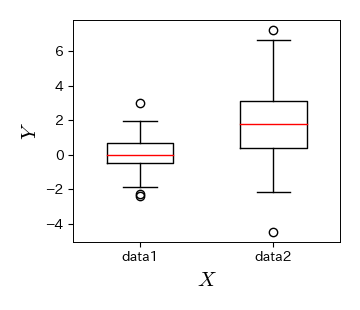

In [23]:
# 箱ひげ図のプロット
fig, ax = plt.subplots()
ret = ax.boxplot([data1, data2], whis=1.5, widths=0.5, vert=1)

# 横軸の目盛りラベル
ax.set_xticklabels(['data1', 'data2'])

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

### 1次元ヒストグラム

データの分布の傾向（ある値のデータがどのくらいあるか）を表す方法として，箱ひげ図ではデータを要約しすぎてしまい適切にその特徴を表せないことがある．
そこで，より詳細に分布の傾向を可視化する方法として度数分布表やそれを可視化した**ヒストグラム（度数分布図）**がある．
度数分布とは，値を0以上10未満，10以上20未満などのいくつかの区間（**階級**，**ビン**）に分けてそれぞれの区間に含まれるデータの個数（**度数**）をまとめたもので，横軸に階級の代表値（**階級値**），縦軸に度数をとったグラフがヒストグラムである．
なお，ヒストグラムの横軸には各階級の最小と最大を表示する場合や，階級の最小値や中央値を示す場合がある．
また，縦軸には度数ではなく相対度数（度数/データ数）を取ることもある．

Matplotlibで1次元ヒストグラムを描画するには`ax.hist`メソッドを用いる：
```python
ax.hist(data, bins, option)
```
- 第１引数には数値データを与える．
- `bins`引数には，ヒストグラムの階級数（または各階級の左端の値）を指定する．
- 例えば，`bins=n`とした場合，１つの階級の大きさは`(最大値-最小値) / n`となる．

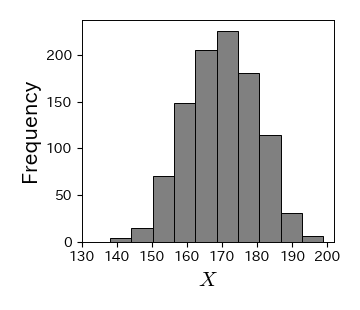

In [114]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, color='gray', edgecolor='k')  # 階級数10

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

以下は上のヒストグラムに対応する度数分布表である．

In [94]:
f, x = ret[0], ret[1]
df = pd.DataFrame(np.c_[x[:-1], x[1:], 0.5*(x[1:]+x[:-1]), f, f/len(data)],
          columns=['最小', '最大', '階級値', '度数', '相対度数'])
df

,最小,最大,階級値,度数,相対度数
0,138.102972,144.180495,141.141733,4.0,0.004
1,144.180495,150.258017,147.219256,15.0,0.015
2,150.258017,156.335540,153.296779,70.0,0.070
3,156.335540,162.413063,159.374301,148.0,0.148
4,162.413063,168.490585,165.451824,205.0,0.205
5,168.490585,174.568108,171.529347,226.0,0.226
6,174.568108,180.645631,177.606869,181.0,0.181
7,180.645631,186.723153,183.684392,114.0,0.114
8,186.723153,192.800676,189.761915,31.0,0.031
9,192.800676,198.878199,195.839437,6.0,0.006


**ヒストグラムの装飾**

`ax.hist`メソッドにも，色やスタイルを変更するためのオプションが多数用意されている．
主要なオプションを以下にまとめる．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| histtype | ヒストグラムのスタイル | 'bar', 'step', 'stepfilled', 'barstacked' |
| color | 塗りつぶしの色 | 色名 |
| edgecolor | 枠線の色 | 色名 |
| linewidth | 枠線の太さ | 数値 |
| linestyle | 線種 | '-', '--', '-.', ':' |
| rwidth | バーの幅 | 数値（0~1） |
| align | バーの中央を階級のどこに合わせるか | 'left'（階級の左端）, 'mid'（階級の中央＝デフォルト）, 'right'（階級の右端） |

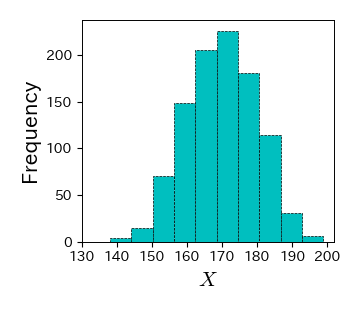

In [95]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

fig, ax = plt.subplots()
ret = ax.hist(data, 
              bins=10,
              # bins=[-4, -3, -2, -1, 0, 1, 2, 3, 4], # 階級の左端の値を指定する場合
              histtype='bar',  # ヒストグラムのスタイルを棒グラフに
              color='c',       # バーの色をシアンに
              edgecolor='k',   # バーの枠線の色を黒に
              linewidth=0.5,     # バーの枠線の太さを1に
              linestyle='--',  # 枠線を点線に
              )

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

**ヒストグラムのタイプ**

`density`オプションにより，ヒストグラムの縦軸を相対度数に変更することができる．
また，`cumulative`オプションにより，縦軸を累積度数に変更することができる．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| density | Trueの場合は縦軸を相対度数に変更 | True/False |
| cumulative | Trueの場合は縦軸を累積度数に変更 | 1（下側累積）, 0, -1（上側累積） |

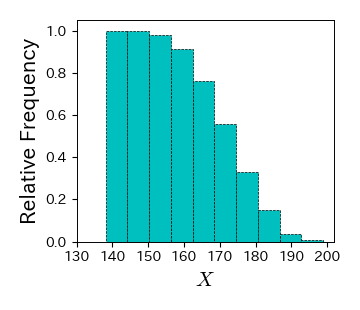

In [96]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

fig, ax = plt.subplots()
ret = ax.hist(data, 
              bins=10,
              # bins=[-4, -3, -2, -1, 0, 1, 2, 3, 4], # 階級の左端の値を指定する場合
              density=1,      # 縦軸を相対度数に変更
              cumulative=-1,  # 上側累積に変更  
              histtype='bar', color='c', ec='k', lw=0.5, ls='--'
              )

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Relative Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

### 2次元ヒストグラム（ヒートマップ）

データ分析では，２つの変数間の相関を見たり，2次元データの分布を可視化する場面がよくあり，このような場合にもヒストグラムが活躍する．
例えば，サッカーの試合においてフィールド上の各位置のシュート頻度を可視化したい場合，$(x, y)$という2次元の座標データに対してシュート頻度（度数）を対応付ければ良い．
このような2次元ヒストグラムを可視化する方法の１つがヒートマップである．

Matplotlibでヒートマップを可視化するには，`hist2d`メソッドを用いる：
```python
ax.hist2d(x_data, y_data, bins, option)
```
- `bins`引数には$x$方向と$y$方向のbinの数（データの分割数），またはbinの左端の値をリストで指定する．
    - 例えば，`bins=10`とした場合には$x,\ y$方向共に10個のbinに分割する．
- `bins=[10, 20]`とした場合には$x$方向を10個，$y$方向を20個のbinに分割する．
    - 実際に実行すると，各binの度数に応じて色分けされた図が表示される．

- その他，主要なオプションを以下にまとめる．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| range | 対象とするデータの範囲 | [[x_min, x_max], [y_min, y_max]] |
| density | 度数の規格化 | True/False |
| cmin | 表示するbinの度数の最小値 | 数値 |
| cmax | 表示するbinの度数の最大値 | 数値 |

In [101]:
# データの作成
X = np.random.normal(loc=0, scale=2, size=100000)
Y = np.random.normal(loc=0, scale=1, size=100000)

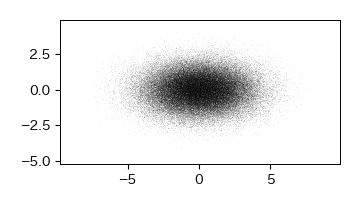

In [110]:
# 散布図
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(X, Y, '.', ms=0.1, alpha=0.3)

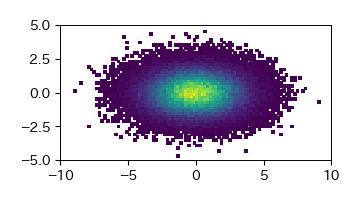

In [108]:
# ヒートマップ
fig, ax = plt.subplots()
ax.set_aspect('equal')
ret = ax.hist2d(X, Y, 
                bins=[100, 50],  # 100x50のbinに分割する
                range=[[-10, 10], [-5, 5]], 
                density=0,  # 度数
                cmin=1,     # 度数が1以上のbinだけ表示
                cmax=1000   # 度数が1000以下のbinだけ表示
                )  

**ヒートマップの装飾と[カラーバーの追加](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.colorbar.html)**

ヒートマップの色は各binの度数に対応している．
この色はカラーマップと呼ばれ，`cmap='カラーマップの名前'`のように指定できる．
主要なカラーマップには'jet'（デフォルト），'rainbow'，'gray'，'autumn'などがある．
その他のカラーマップは[ここ](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)を参照のこと．

カラーマップと度数の対応はカラーバーとして可視化できる．
ヒートマップにカラーバーを追加するにはFigureオブジェクトの`colorbar`メソッド用い，以下のように実行する：
```python
ret = ax.hist2d(X, Y, bins=[bx, by], option)
fig.colorbar(ret[3], option)
```
ここで，`colorbar`メソッドの第１引数には`hist2d`メソッドの戻り値の第3成分を指定する．
また，カラーバーの位置や大きさを調整するには，以下のオプションを使用する．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| orientation | カラーバーの向き | 'vertical' / 'horizontal' |
| shrink | カラーバーの拡大率 | 数値 |
| aspect | カラーバーの縦横比 | 数値 |
| pad | カラーバーの位置 | 数値 |

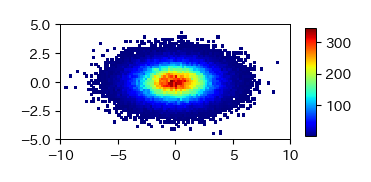

In [111]:
# データの生成
X = np.random.normal(loc=0, scale=2, size=100000)
Y = np.random.normal(loc=0, scale=1, size=100000)
bx, by = 100, 50

# ヒートマップの描画
fig, ax = plt.subplots()
ax.set_aspect('equal')
ret = ax.hist2d(X, Y, bins=[bx, by], range=[[-10, 10], [-5, 5]],\
                cmap='jet', cmin=1)

# カラーバーを追加
fig.colorbar(ret[3], orientation='vertical', 
             shrink=0.4, aspect=10, pad=0.05)

## レポート問題

次のcsvファイルをダウンロードし，作業フォルダ（例えば`OneDrive/sport_data/5_matplotlib`）に移動せよ：[player_all.csv](https://drive.google.com/uc?export=download&id=1E3ahjvdekZzCu63k1oECs_GOJTS294BP) <br>
このファイルには，2017年度にヨーロッパリーグ（イングランド，フランス，ドイツ，イタリア，スペイン）に所属していた選手のデータが保存されている．<br>
※ 本データはPappalardoデータセットを加工したものである（詳細は[イベントデータの解析](https://rtwqzpj5uefb1pvzmprbnq-on.drv.tw/document/講義/立正/スポーツデータ分析のためのプログラミング/6_event.html)）．

In [76]:
df = pd.read_csv('./5_matplotlib/player_all.csv', header=0, index_col='player_id', na_values=0)
df

,name,team_id,role,height,weight,foot,nationality,birth_area,birthday,league
player_id,,,,,,,,,,
3319,M_Özil,1609,MD,180.0,76.0,left,Germany,Germany,1988/10/15,England
3560,Nach_Monreal,1609,DF,179.0,72.0,left,Spain,Spain,1986/02/26,England
7855,L_Koscielny,1609,DF,186.0,75.0,right,Poland,France,1985/09/10,England
7870,A_Ramsey,1609,MD,183.0,76.0,right,Wales,Wales,1990/12/26,England
7882,P_Čech,1609,GK,196.0,90.0,left,Czec_Republic,Czec_Republic,1982/05/20,England
...,...,...,...,...,...,...,...,...,...,...
266885,M_Olunga,756,FW,188.0,80.0,left,Kenya,Kenya,1994/03/26,Spain
282448,Alei_García,756,MD,173.0,74.0,right,Spain,Spain,1997/06/28,Spain
366374,K_Soni,756,MD,182.0,77.0,left,Cameroon,Cameroon,1998/04/17,Spain


**問題A：体重の箱ひげ図**
- `England`リーグに所属する選手の体重のデータから欠損値を除外したデータは以下で取得できる．
    ```python
    data1 = df.loc[df['league']=='England', 'weight'].dropna()
    ```
- 全てのリーグに対して同様のデータを求め，以下のようなリストを作成せよ
    ```python
    D = [data1, data2, ...]
    ```

- リスト`D`を用いて，体重の箱ひげ図をリーグ別に作成せよ．ただし，横軸の目盛りをリーグ名とせよ．

**問題B：身長のヒストグラム**
- `England`リーグに所属する選手の身長のヒストグラムを以下の条件で作成せよ：
    - 横軸のラベル：`height [cm]`
    - 縦軸のラベル：`Frequency`
    - 階級の数：10
    - その他の装飾は自由

## 参考

### 描画結果の出力先

Matplotlibは使う環境によってグラフを画面に出力する方法が異なる．
ここではJupyter NotebookとPythonスクリプトでの出力方法を解説する．

**（推奨）Jupyter Labで実行し，Notebook内に表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`inline`を指定すると，コードセルの下に描画結果が表示される．
デフォルトではこの設定になっているはずである．

**※ 一番最後のコマンドにセミコロンを付けることがある．これは，不要な文字列が出力されるのを防ぐ（隠す）ためである．**

In [9]:
# notebook内に出力する
%matplotlib inline

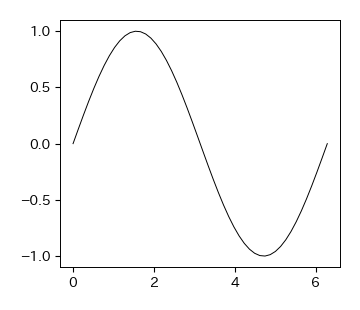

In [11]:
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x));

**（参考）Jupyter Labで実行し，別ウインドウに表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`tk`を指定すると，描画結果が別画面に出力される．

In [6]:
# 別ウインドウに出力する
%matplotlib tk

なお，'inline'や'tk'はバックエンドと呼ばれ，以下が利用可能である．

In [7]:
# 現在のバックエンドを確認
print(matplotlib.get_backend())

TkAgg


In [12]:
# 利用可能なバックエンドのリストを表示
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


### ２つのプロットスタイル

**FigureとAxes**

Matplotlibの描画エリアは下図のようにFigureオブジェクト, Axesオブジェクトという要素で構成されている．
Figureは描画エリア全体を表し，その中に複数のAxes（座標軸）が存在するという構造になっている．
グラフのプロットや装飾はAxesオブジェクト（座標軸）のメソッドを用いて行う．

```{figure} ../figure/fig_axes.png
---
height: 250px
name: fig:fig_axes
---
MatplotlibにおけるFigureオブジェクトとAxesオブジェクト
```

Matplotlibには２つのプロットスタイルが存在し，方法１を**オブジェクト指向スタイル**，方法２を**MATLABスタイル**と呼ぶ．
オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成し，生成したオブジェクトのメソッドを用いてグラフを作成する．
この方法は，ややコードが長くなるが，グラフの細部の調整を行いたい場合に便利である．
一方，MATLABスタイルはFigureオブジェクトとAxesオブジェクトを明示的に生成しないので，手軽にプロットできるが，複雑なグラフや細かい調整を行うには不便である．
**本講義では，オブジェクト指向スタイルを採用する．**

**（推奨）方法１：オブジェクト指向スタイル**

オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成した上で，生成したオブジェクトのメソッドを用いてプロットを行う．
基本的には以下の手順に従う．

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(4, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

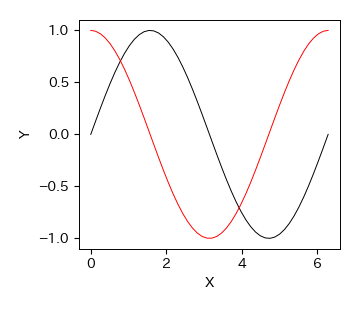

In [14]:
# FigureとAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
fig.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

**（非推奨）方法２：MATLABスタイル**

MATLABスタイルの場合，FigureとAxesの生成は自動的に行われる．
オブジェクト指向スタイルでは生成したAxesに対して`ax.plot()`のようにプロットしたが，
MATLABスタイルでは，プロット，装飾，保存など全てのコマンドが`plt.`から始まる．
特に，グラフの装飾のコマンドに`set_`が付かないことに注意する．

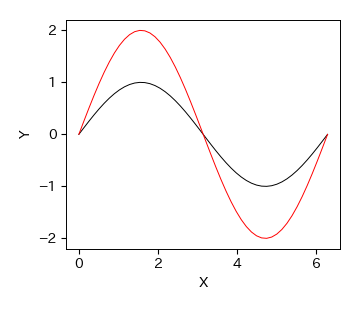

In [12]:
# プロットする
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x))
plt.plot(x, 2*np.sin(x))

# Axesを装飾する
plt.xlabel('X'); plt.ylabel('Y')

# Figureを保存する
plt.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

### FigureとAxesの生成
---

**FigureとAxesを同時に生成**

`plt.subplots(nrows, ncols, option)`により，FigureとAxesを同時に生成できる．
通常は`nrows`と`ncols`を省略し，`fig, ax = plt.subplots()`のようにして1つのAxesだけを生成する．
複数のAxesを生成した場合は`nrows`に縦方向の分割数，`ncols`に横方向の分割数を指定する．
例えば，`nrows=2, ncols=3`とすると，2×3=6個のAxesが生成される．
これ以外に以下のオプションがある．

| オプション | 内容 | 指定の仕方 |
| ---- | ---- | ---- | 
| figsize | Figureのサイズ | (width, height) |
| facecolor | 背景の色 | 'white'（デフォルト）, 'red'など |
| tight_layout | 余白の自動調整 | True or False |
| linewidth | 枠線の太さ | 数値 |
| edgecolor | 枠線の色 | 'black', Noneなど |

Text(0, 0.5, 'Y')

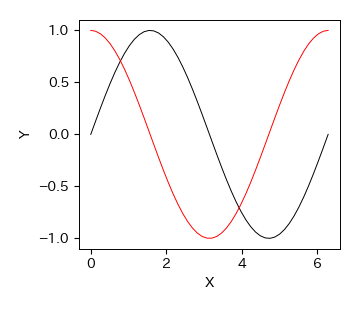

In [13]:
# Figureと1つのAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
# fig.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

Text(0, 0.5, 'Y')

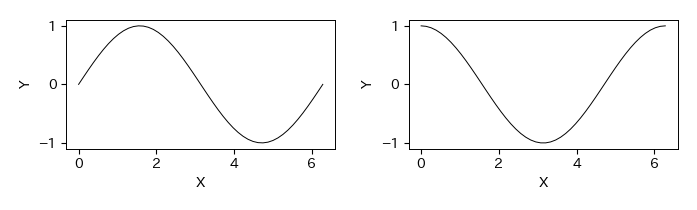

In [14]:
'''複数のAxes'''

# Figureと複数のAxesを生成する
fig, axs = plt.subplots(1, 2, figsize=(7, 2), facecolor='white', tight_layout=True)

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))

# Axesを装飾する
axs[0].set_xlabel('X'); axs[0].set_ylabel('Y')
axs[1].set_xlabel('X'); axs[1].set_ylabel('Y')

# Figureを保存する
# fig.savefig('./5_matplotlib/2_axes.pdf', bbox_inches='tight')

**Figureを生成して，後からAxesを追加**

`fig = plt.figure()`でFigureのみを生成できる．オプションは`plt.subplots()`と同じ．
また，`fig.add_subplot(LMN)`でAxesを1つずつ追加できる．
ここで，Lは行方向の分割数，Mは列方向の分割数，Nは追加したいAxesの番号を表す．

Text(0, 0.5, 'Y')

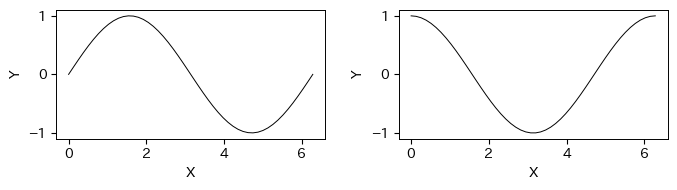

In [112]:
# Figureの生成
fig = plt.figure(figsize=(7, 2))

# Axesの追加
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Axesに対するプロット
x = np.linspace(0, 2*np.pi)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# Axesの装飾
ax1.set_xlabel('X'); ax1.set_ylabel('Y')
ax2.set_xlabel('X'); ax2.set_ylabel('Y')

# Figureの保存
# fig.savefig('./5_matplotlib/2_axes.pdf', bbox_inches='tight')